# SYS 611: Demand Process Generator (Discrete IVT)

Paul T. Grogan <pgrogan@stevens.edu>

This example shows how to create a discrete proces generator using the inverse transform method.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy` and `matplotlib.pyplot` libraries.

In [1]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
# see http://docs.scipy.org/doc/numpy/reference/ for documentation
import numpy as np

# import the matplotlib pyplot package and refer to it as `plt`
# see http://matplotlib.org/api/pyplot_api.html for documentation
import matplotlib.pyplot as plt

## Source Data

This process generator will generate new demands for coffee based on size. Values are encided by zero-based indices with none=0, small=1, medium=2, large=3. To fit the underlying probability distribution, 50 observations record 8 customers with no coffee order, 10 for small, 22 for medium, and 10 for large.

In [3]:
# create a numpy array with the demand sizes
demands = np.array([0, 1, 2, 3])
labels = ["None", "Small", "Medium", "Large"]
print("demands = {}".format(demands))

# create a numpy array with the observed frequencies
frequency = np.array([8, 10, 22, 10])
print("frequency = {}".format(frequency))

demands = [0 1 2 3]
frequency = [ 8 10 22 10]


The empirical probability mass function (PMF) is the number of demands (frequency) divided by the total number of demands (sum of all frequency). This PMF can be displayed using a bar plot.

pmf = [0.16 0.2  0.44 0.2 ]


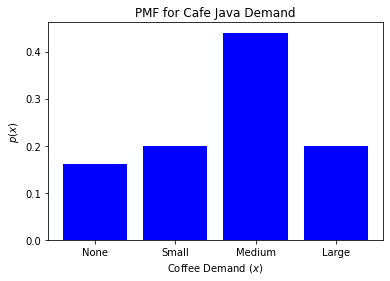

In [66]:
pmf = frequency/np.sum(frequency)
print("pmf = {}".format(pmf))

plt.figure()
plt.bar(demands, pmf, color='blue')
plt.ylabel('$p(x)$')
plt.xlabel('Coffee Demand ($x$)')
plt.title('PMF for Cafe Java Demand')
plt.xticks(demands, labels)
plt.show()

The empirical cumulative distribution function (CDF) is the cumulative sum of the PMF previously compted. This CDF can be displayed using a step line plot.

cdf = [0.16 0.36 0.8  1.  ]


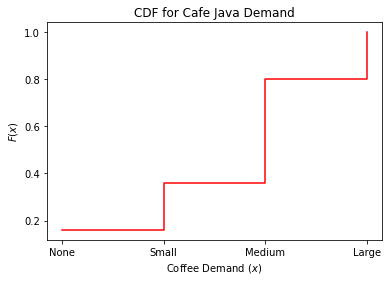

In [20]:
cdf = np.cumsum(pmf)
print("cdf = {}".format(cdf))

plt.figure()
plt.step(demands, cdf, '-r', where='post')
plt.ylabel('$F(x)$')
plt.xlabel('Coffee Demand ($x$)')
plt.title('CDF for Cafe Java Demand')
plt.xticks(demands, labels)
plt.show()

## Process Generator

The inverse transform method uses knowledge of the CDF to generate new samples.

In [30]:
def generate_demand_ivt():
    """Generates a demand following the inverse transform method.
    
    Returns:
        demand (int): the size of coffee demanded    
    """
    # generate a random sample r
    r = np.random.rand()
    
    # check the first cdf entry (index 0) 
    if r <= cdf[0]:
        return demands[0]
    # check the second cdf entry (index 1)
    elif r <= cdf[1]:
        return demands[1]
    # check the third cdf entry (index 2)
    elif r <= cdf[2]:
        return demands[2]
    # otherwise no need to check, it's the final CDF entry (index 3)
    else:
        return demands[3]
        
    """
    note: the code above could be replaced with the following for 
    loop which iterates over each array index i in demands
    
    for i in range(len(demands)):
        if r <= cdf[i]:
            return demands[i]
    """

print('example demand index: {:}'.format(generate_demand_ivt()))

example demand index: 0


## Verification Study

A simple verification study can generage a large number of samples (say, 1000) and compare to to the empirical distribution.

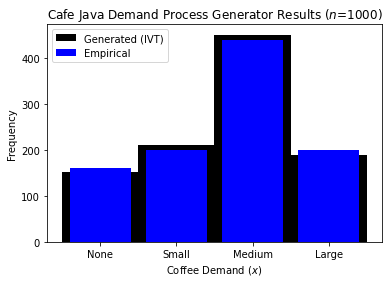

In [68]:
# define number of samples
num_samples = 1000

# fill the samples arrays with samples from the generators
samples_ivt = [generate_demand_ivt() for i in range(num_samples)]

# create a new figure recreating the PMF bar plot
plt.figure()
plt.hist(samples_ivt, bins=range(5), align='left', color='black', label='Generated (IVT)')
plt.bar(demands, pmf*num_samples, color='blue', label='Empirical')
plt.ylabel('Frequency')
plt.xlabel('Coffee Demand ($x$)')
plt.title('Cafe Java Demand Process Generator Results ($n$={})'.format(num_samples))
plt.xticks(demands, labels)
plt.legend()
plt.show()